In [2]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines, ChipResonatorsThreeTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

Permeability and thickness heterostructure

In [4]:
epsilon_r = [15.18, 16, 15.18, 16, 11.9]
thickness_subs = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]

Feedline

In [5]:
epsilon_r = 11.9
thickness_subs = 500e-6
FeedlineWidth = 52
FeedlineLength  = 5400
FeedlineGap= 20
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 200
BondpadGap = 200*50/80

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=13.5e-12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=13.5e-12, length_CPW=(FeedlineLength + FeedlineTaperLength + BondpadLength)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.26339721808462 Ohm
Frequency of the feedline is 2.1923824876462703 GHz


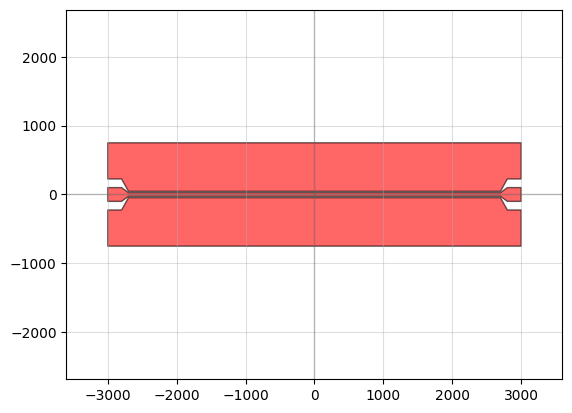

In [6]:
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 1500]

_, _, TLine = ChipTline(ChipSize,
                          FeedlineWidth, 
                          FeedlineLength, 
                          FeedlineGap, 
                          FeedlineTaperLength, 
                          BondpadWidth, 
                          BondpadLength, 
                          BondpadGap)
qp(TLine)
#TLine.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\Tline-2.gds")

Resonator 1
 Geometric: 0.5863517319206054 nH/m
 Kinetic: 22.5 nH/m
 Ltot: 23.086351731920608 nH
 Cg: 64.99894755637125 fF
 Cc: 0.3673555191939407 fF
Resonator 2
 Geometric: 2.2672286422190613 nH/m
 Kinetic: 87.3 nH/m
 Ltot: 89.56722864221906 nH
 Cg: 64.99894755637125 fF
 Cc: 0.3673555191939407 fF
Inductor total length is [ 500. 1940.]
The frequencies are [np.float64(4.096995774005861), np.float64(2.080025224537546)]


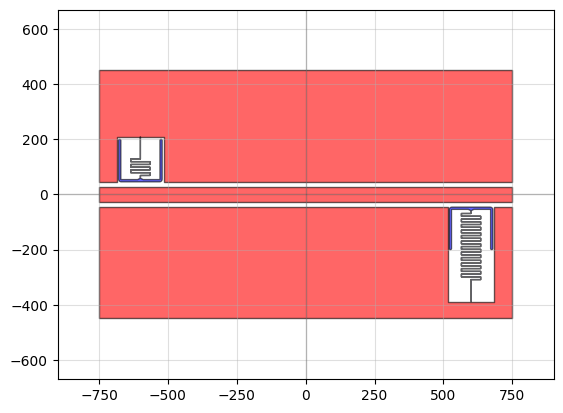

In [75]:
NumberOfResonators = int(2)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[4,22]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*[70]
InductorHorizontalLength = np.ones(NumberOfResonators)*[70]
InductorWidth = np.ones(NumberOfResonators)*0.3
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)


FeedlineLength = 1500
ChipSize = [FeedlineLength, 900]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\juliantryingstuff\tworesonator_indlength_500_2020_width_0.3.gds")
qp(chip)

In [8]:
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

Ind_width =  np.linspace(0.1,2,100)
freqs = []
for x in range(len(Ind_width)):
    #Resonator parameters
    CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
    CapacitorVerticalLength = np.ones(NumberOfResonators)*150
    CapacitorWidth = np.ones(NumberOfResonators)*8

    NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7]
    InductorVerticalLength = np.ones(NumberOfResonators)*10
    InductorEndLength = np.ones(NumberOfResonators)*[70]
    InductorHorizontalLength = np.ones(NumberOfResonators)*[70]


    InductorWidth = np.ones(NumberOfResonators)*x


    TaperWidth = np.ones(NumberOfResonators)*20
    InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


    SpacingC0 = np.ones(NumberOfResonators)*5
    SpacingCc = np.ones(NumberOfResonators)*[0]
    TaperLength = np.ones(NumberOfResonators)*5
    FinalSpacingBondpads = 100

    # freq = resonance_freq_Schuster(InductorWidth*1e-6, CapacitorWidth*1e-6, (SeparationTlineResonator + FeedlineGap + SpacingCc)*1e-6 , FeedlineWidth*1e-6,
    #                                             CapacitorVerticalLength*1e-6, SpacingC0*1e-6, 
    #                                             InductorWidth*1e-6, InductorTotalLength*1e-6, 13.5e-12,
    #                                         epsilon_r, thickness_subs)/1e9

    freqs = []       
    for i in range(NumberOfResonators):
        print(f'Resonator {i+1}')
        freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                                CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                                InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                            epsilon_r, thickness_subs)/1e9)                                        

    print('Inductor total length is', InductorTotalLength)
    print('The frequencies are', freqs)

print('The frequencies are', freqs)

FeedlineLength = 500
ChipSize = [FeedlineLength, 500]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-Last-1.gds")
#qp(chip)

Resonator 1
 Geometric: inf nH/m
 Kinetic: inf nH/m
 Ltot: inf nH
 Cg: inf fF
 Cc: 0.7720851772761601 fF
Inductor total length is [740.]
The frequencies are [np.float64(0.0)]
Resonator 1
 Geometric: 0.6934038001345344 nH/m
 Kinetic: 9.990000000000002 nH/m
 Ltot: 10.683403800134535 nH
 Cg: 50.96832050690628 fF
 Cc: 0.43973447651763514 fF
Inductor total length is [740.]
The frequencies are [np.float64(6.791250084287096)]
Resonator 1
 Geometric: 0.5995822930622906 nH/m
 Kinetic: 4.995000000000001 nH/m
 Ltot: 5.594582293062292 nH
 Cg: 43.36946047407468 fF
 Cc: 0.49565371227954474 fF
Inductor total length is [740.]
The frequencies are [np.float64(10.159601331162031)]
Resonator 1
 Geometric: 0.548575401156078 nH/m
 Kinetic: 3.33 nH/m
 Ltot: 3.8785754011560774 nH
 Cg: 39.24299623924961 fF
 Cc: 0.534660054828628 fF
Inductor total length is [740.]
The frequencies are [np.float64(12.813400973266514)]
Resonator 1
 Geometric: 0.5148265014675246 nH/m
 Kinetic: 2.4975000000000005 nH/m
 Ltot: 3.01232

c:\Users\localadmin\Documents\GitHub\resonators\Schuster_Resonators\approx_Schuster.py:188: RuntimeWarning: divide by zero encountered in scalar divide
  kinetic = ind_kin_sq/width_ind


ValueError: [PHIDL] smooth(): Not enough distance between points to fit curves.  Try reducing the radius or spacing the points out farther

Resonator 1
 Geometric: 1.028399471473293 nH/m
 Kinetic: 99.89999999999999 nH/m
 Ltot: 100.92839947147328 nH
 Cg: 77.97539437476931 fF
 Cc: 0.3198648883104506 fF
Inductor total length is [740.]
The frequencies are [np.float64(1.7903820095454404)]


<>:81: SyntaxWarning: invalid escape sequence '\m'
<>:81: SyntaxWarning: invalid escape sequence '\m'
C:\Users\localadmin\AppData\Local\Temp\ipykernel_23584\3823192746.py:81: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("inductor width ($\mu$m)")


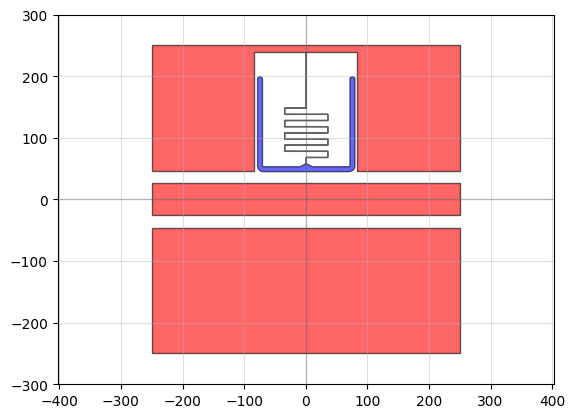

Resonator 1
 Geometric: 0.8611752554057178 nH/m
 Kinetic: 32.11071428571428 nH/m
 Ltot: 32.97188954112 nH
 Cg: 64.56900571801805 fF
 Cc: 0.3691833565235135 fF
Inductor total length is [740.]
The frequencies are [np.float64(3.439522278849498)]


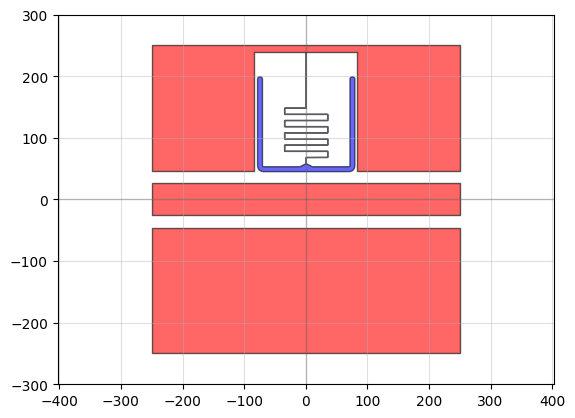

Resonator 1
 Geometric: 0.7858490785045955 nH/m
 Kinetic: 19.129787234042553 nH/m
 Ltot: 19.915636312547147 nH
 Cg: 58.46983088959229 fF
 Cc: 0.3974242247507969 fF
Inductor total length is [740.]
The frequencies are [np.float64(4.64821433066041)]


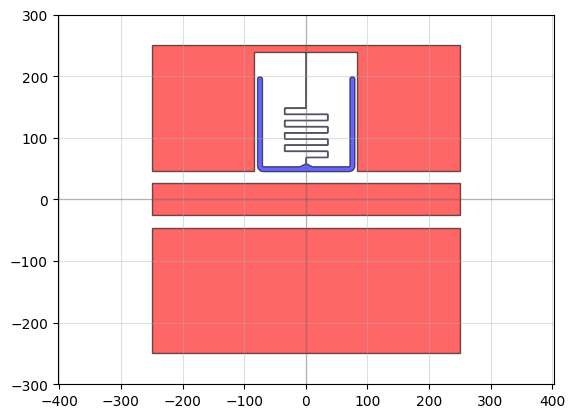

Resonator 1
 Geometric: 0.737160438876742 nH/m
 Kinetic: 13.622727272727275 nH/m
 Ltot: 14.359887711604017 nH
 Cg: 54.51901363132423 fF
 Cc: 0.4184662394621299 fF
Inductor total length is [740.]
The frequencies are [np.float64(5.666439328138267)]


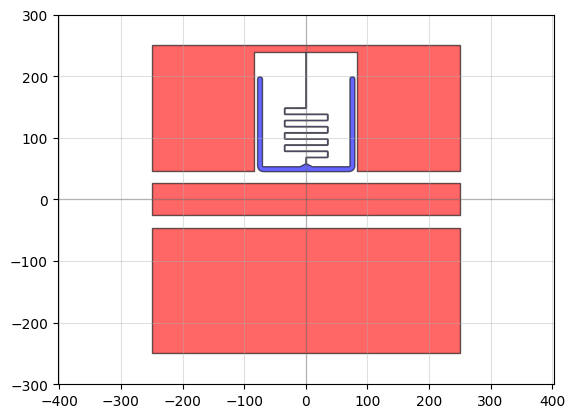

Resonator 1
 Geometric: 0.7014043325688619 nH/m
 Kinetic: 10.57764705882353 nH/m
 Ltot: 11.279051391392393 nH
 Cg: 51.61734905384717 fF
 Cc: 0.435656450043825 fF
Inductor total length is [740.]
The frequencies are [np.float64(6.568420361495935)]


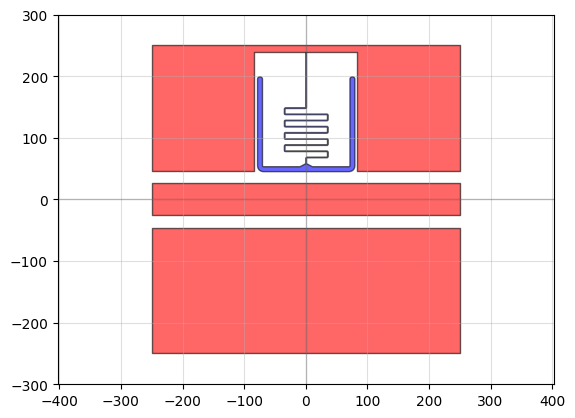

Resonator 1
 Geometric: 0.6733154361250785 nH/m
 Kinetic: 8.645192307692309 nH/m
 Ltot: 9.318507743817385 nH
 Cg: 49.33929444168062 fF
 Cc: 0.4503885583430779 fF
Inductor total length is [740.]
The frequencies are [np.float64(7.388857072574498)]


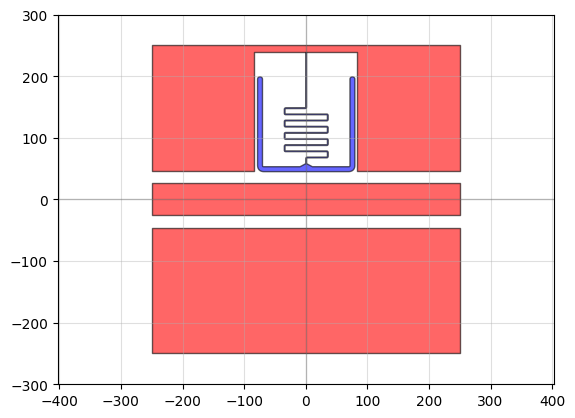

Resonator 1
 Geometric: 0.6503039996683199 nH/m
 Kinetic: 7.309756097560975 nH/m
 Ltot: 7.960060097229296 nH
 Cg: 47.47453239465109 fF
 Cc: 0.4633905923635554 fF
Inductor total length is [740.]
The frequencies are [np.float64(8.14746215148047)]


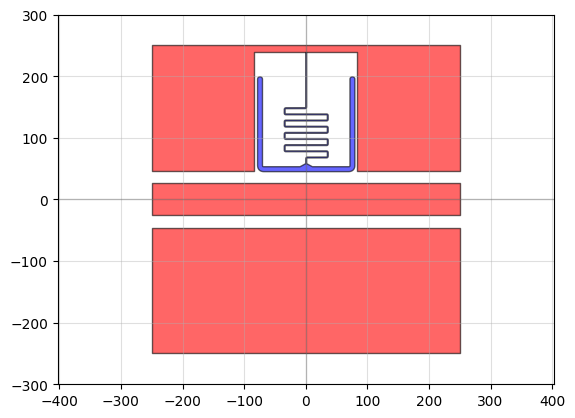

Resonator 1
 Geometric: 0.6309023421172021 nH/m
 Kinetic: 6.33169014084507 nH/m
 Ltot: 6.962592482962272 nH
 Cg: 45.903498896789614 fF
 Cc: 0.4750959054412703 fF
Inductor total length is [740.]
The frequencies are [np.float64(8.856779859522227)]


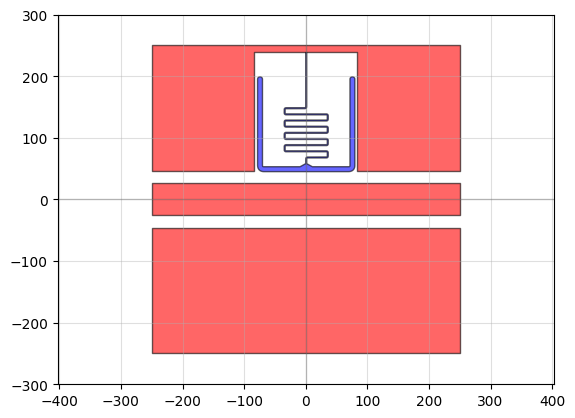

Resonator 1
 Geometric: 0.6141974263039438 nH/m
 Kinetic: 5.584472049689441 nH/m
 Ltot: 6.198669475993385 nH
 Cg: 44.55167171648115 fF
 Cc: 0.4857856356552157 fF
Inductor total length is [740.]
The frequencies are [np.float64(9.525416183072386)]


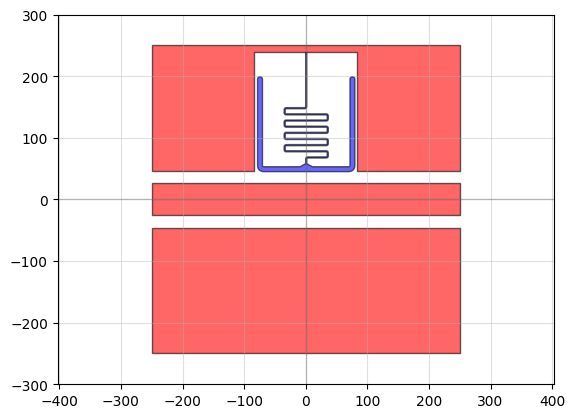

Resonator 1
 Geometric: 0.5995822930622906 nH/m
 Kinetic: 4.995000000000001 nH/m
 Ltot: 5.594582293062292 nH
 Cg: 43.36946047407468 fF
 Cc: 0.49565371227954474 fF
Inductor total length is [740.]
The frequencies are [np.float64(10.159601331162031)]


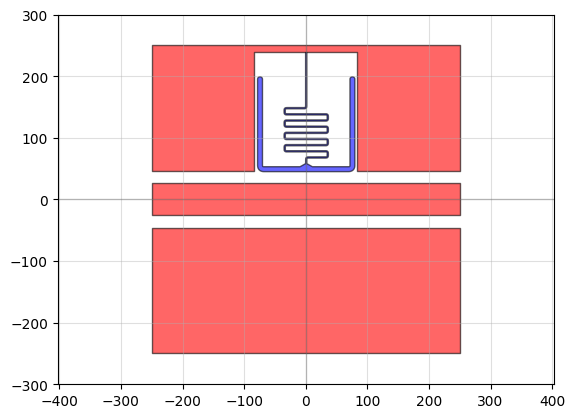

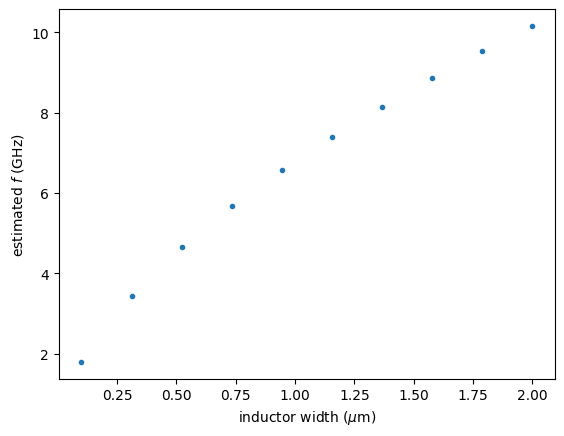

In [20]:
#changing width of inductor

NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators


l = np.linspace(100,180,10)
Ind_width =  np.linspace(0.1,2,10)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*[70]
InductorHorizontalLength = np.ones(NumberOfResonators)*[70]


#InductorWidth = Ind_width 
InductorWidth = np.ones(NumberOfResonators)*0.6

TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freq = resonance_freq_Schuster(InductorWidth*1e-6, CapacitorWidth*1e-6, (SeparationTlineResonator + FeedlineGap + SpacingCc)*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength*1e-6, SpacingC0*1e-6, 
#                                             InductorWidth*1e-6, InductorTotalLength*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9

# freqs = []       
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)



FeedlineLength = 500
ChipSize = [FeedlineLength, 500]
freqs = []
for j in range(len(Ind_width)):
    InductorWidth = np.ones(NumberOfResonators)*Ind_width[j]

    freq = []
    for i in range(NumberOfResonators):
        print(f'Resonator {i+1}')
        freq.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                                CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                                InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                            epsilon_r, thickness_subs)/1e9)                                        

    print('Inductor total length is', InductorTotalLength)
    print('The frequencies are', freq) 
    freqs.append(freq)


    c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                            FeedlineWidth, FeedlineLength, FeedlineGap, 
                            FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                            CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                            NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                            TaperWidth, TaperLength, SpacingC0, SpacingCc,
                            FinalSpacingBondpads, MWO_simulation=True)      
    #chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/juliantryingstuff/variableindwidth/singleres_indwidth_{round(Ind_width[i],2)}.gds")
    qp(chip)

plt.plot(Ind_width,freqs, '.')
plt.xlabel("inductor width ($\mu$m)")
plt.ylabel("estimated $f$ (GHz)")
plt.show()

<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
C:\Users\localadmin\AppData\Local\Temp\ipykernel_23584\3363460825.py:77: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("total length inductor ($\mu$m)")


Resonator 1
 Geometric: 0.5182732027301619 nH/m
 Kinetic: 11.25 nH/m
 Ltot: 11.768273202730164 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Inductor total length is [500.]
The frequencies are [np.float64(6.13143727490624)]
Resonator 1
 Geometric: 0.6008007827827353 nH/m
 Kinetic: 13.05 nH/m
 Ltot: 13.650800782782737 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Inductor total length is [580.]
The frequencies are [np.float64(5.692979191816861)]
Resonator 1
 Geometric: 0.6833283628353088 nH/m
 Kinetic: 14.85 nH/m
 Ltot: 15.533328362835311 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Inductor total length is [660.]
The frequencies are [np.float64(5.336867238353823)]
Resonator 1
 Geometric: 0.7658559428878824 nH/m
 Kinetic: 16.65 nH/m
 Ltot: 17.415855942887884 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Inductor total length is [740.]
The frequencies are [np.float64(5.040182347020097)]
Resonator 1
 Geometric: 0.8483835229404559 nH/m
 Kinetic: 18.

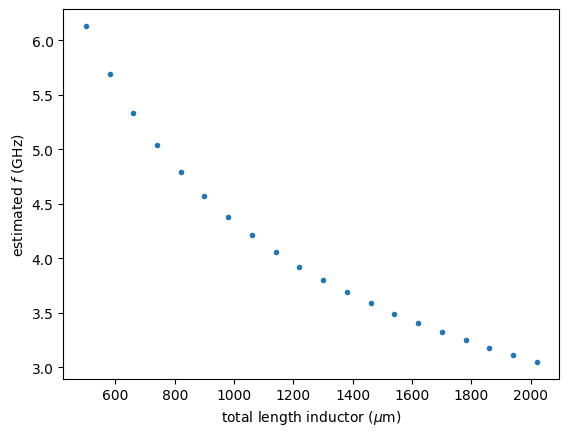

In [32]:
#changing width of inductor

NumberOfResonators = int(2)
SeparationTlineResonator = [0]*NumberOfResonators

#define variable resonator parameters
l = np.linspace(100,180,10)
Ind_width =  np.linspace(0.1,2,10)
n_bends = np.array([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])




freqs = []
Ilength = []
for j in range(len(n_bends)):
    
    

    #Resonator parameters
    CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
    CapacitorVerticalLength = np.ones(NumberOfResonators)*150
    CapacitorWidth = np.ones(NumberOfResonators)*8

    #NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7]
    NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[n_bends[j]]


    InductorVerticalLength = np.ones(NumberOfResonators)*10
    InductorEndLength = np.ones(NumberOfResonators)*[70]
    InductorHorizontalLength = np.ones(NumberOfResonators)*[70]


    #InductorWidth = Ind_width 
    InductorWidth = np.ones(NumberOfResonators)*0.6
    #InductorWidth = np.ones(NumberOfResonators)*Ind_width[j]


    TaperWidth = np.ones(NumberOfResonators)*20
    InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)

    Ilength.append(InductorTotalLength)

    SpacingC0 = np.ones(NumberOfResonators)*5
    SpacingCc = np.ones(NumberOfResonators)*[0]
    TaperLength = np.ones(NumberOfResonators)*5
    FinalSpacingBondpads = 100

    FeedlineLength = 500
    ChipSize = [FeedlineLength, 800]


    freq = []
    for i in range(NumberOfResonators):
        print(f'Resonator {i+1}')
        freq.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                                CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                                InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                            epsilon_r, thickness_subs)/1e9)                                        

    print('Inductor total length is', InductorTotalLength)
    print('The frequencies are', freq) 
    freqs.append(freq)


    c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                            FeedlineWidth, FeedlineLength, FeedlineGap, 
                            FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                            CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                            NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                            TaperWidth, TaperLength, SpacingC0, SpacingCc,
                            FinalSpacingBondpads, MWO_simulation=True)      
    #chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/juliantryingstuff/variableindwidth/singleres_indwidth_{round(Ind_width[i],2)}.gds")
    #qp(chip)

plt.plot(Ilength,freqs, '.')
plt.xlabel("total length inductor ($\mu$m)")
plt.ylabel("estimated $f$ (GHz)")
plt.show()

<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
C:\Users\localadmin\AppData\Local\Temp\ipykernel_23584\2058168944.py:77: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("total length inductor ($\mu$m)")


Resonator 1
 Geometric: 0.5182732027301619 nH/m
 Kinetic: 11.25 nH/m
 Ltot: 11.768273202730164 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Resonator 2
 Geometric: 2.0862972237290593 nH/m
 Kinetic: 45.45 nH/m
 Ltot: 47.536297223729065 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Inductor total length is [ 500. 2020.]
The frequencies are [np.float64(6.13143727490624), np.float64(3.0507455455767922)]
Resonator 1
 Geometric: 0.6008007827827353 nH/m
 Kinetic: 13.05 nH/m
 Ltot: 13.650800782782737 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Resonator 2
 Geometric: 2.0862972237290593 nH/m
 Kinetic: 45.45 nH/m
 Ltot: 47.536297223729065 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Inductor total length is [ 580. 2020.]
The frequencies are [np.float64(5.692979191816861), np.float64(3.0507455455767922)]
Resonator 1
 Geometric: 0.6833283628353088 nH/m
 Kinetic: 14.85 nH/m
 Ltot: 15.533328362835311 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF


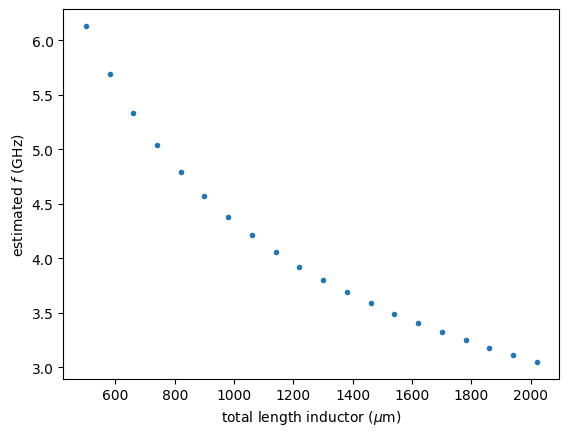

In [49]:
#changing width of inductor

NumberOfResonators = int(2)
SeparationTlineResonator = [0]*NumberOfResonators

#define variable resonator parameters
l = np.linspace(100,180,10)
Ind_width =  np.linspace(0.1,2,10)
n_bends = np.array([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])




freqs = []
Ilength = []
for j in range(int(len(n_bends))):
    
    

    #Resonator parameters
    CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
    CapacitorVerticalLength = np.ones(NumberOfResonators)*150
    CapacitorWidth = np.ones(NumberOfResonators)*8

    #NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7]
    NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[n_bends[j], n_bends[-1]]


    InductorVerticalLength = np.ones(NumberOfResonators)*10
    InductorEndLength = np.ones(NumberOfResonators)*[70]
    InductorHorizontalLength = np.ones(NumberOfResonators)*[70]


    #InductorWidth = Ind_width 
    InductorWidth = np.ones(NumberOfResonators)*0.6
    #InductorWidth = np.ones(NumberOfResonators)*Ind_width[j]


    TaperWidth = np.ones(NumberOfResonators)*20
    InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)

    Ilength.append(InductorTotalLength[0])

    SpacingC0 = np.ones(NumberOfResonators)*5
    SpacingCc = np.ones(NumberOfResonators)*[0]
    TaperLength = np.ones(NumberOfResonators)*5
    FinalSpacingBondpads = 100

    FeedlineLength = 1500
    ChipSize = [FeedlineLength, 1000]


    freq = []
    for i in range(NumberOfResonators):
        print(f'Resonator {i+1}')
        freq.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                                CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                                InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                            epsilon_r, thickness_subs)/1e9)                                        

    print('Inductor total length is', InductorTotalLength)
    print('The frequencies are', freq) 
    freqs.append(freq[0])


    c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                            FeedlineWidth, FeedlineLength, FeedlineGap, 
                            FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                            CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                            NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                            TaperWidth, TaperLength, SpacingC0, SpacingCc,
                            FinalSpacingBondpads, MWO_simulation=True)      
    chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/juliantryingstuff/variableindlength/singleres_indlength_{round(InductorTotalLength[0])}_{round(InductorTotalLength[1])}.gds")
    #qp(chip)

plt.plot(Ilength,freqs, '.')
plt.xlabel("total length inductor ($\mu$m)")
plt.ylabel("estimated $f$ (GHz)")
plt.show()

Resonator 1
 Geometric: 1.028399471473293 nH/m
 Kinetic: 99.89999999999999 nH/m
 Ltot: 100.92839947147328 nH
 Cg: 77.97539437476931 fF
 Cc: 0.3198648883104506 fF
Resonator 2
 Geometric: 0.5995822930622906 nH/m
 Kinetic: 4.995000000000001 nH/m
 Ltot: 5.594582293062292 nH
 Cg: 43.36946047407468 fF
 Cc: 0.49565371227954474 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(1.7903820095454404), np.float64(10.159601331162031)]


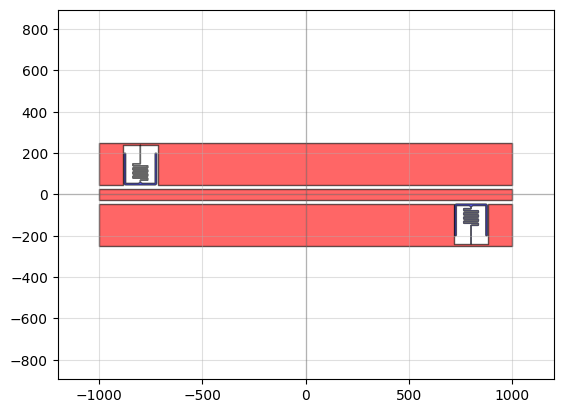

Resonator 1
 Geometric: 0.9260437117450261 nH/m
 Kinetic: 49.949999999999996 nH/m
 Ltot: 50.87604371174503 nH
 Cg: 69.79608930182516 fF
 Cc: 0.34818767049681715 fF
Resonator 2
 Geometric: 0.6062749498219092 nH/m
 Kinetic: 5.257894736842106 nH/m
 Ltot: 5.864169686664016 nH
 Cg: 43.91078009432536 fF
 Cc: 0.49107190861572536 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(2.664203191716123), np.float64(9.86316559955052)]


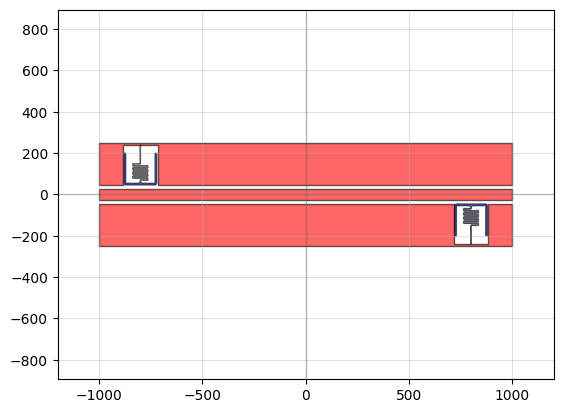

Resonator 1
 Geometric: 0.8664978836370146 nH/m
 Kinetic: 33.3 nH/m
 Ltot: 34.166497883637014 nH
 Cg: 64.99894755637125 fF
 Cc: 0.3673555191939407 fF
Resonator 2
 Geometric: 0.6133804471262757 nH/m
 Kinetic: 5.55 nH/m
 Ltot: 6.1633804471262765 nH
 Cg: 44.485575971629494 fF
 Cc: 0.4863240793440756 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(3.3677739815952683), np.float64(9.559606703466857)]


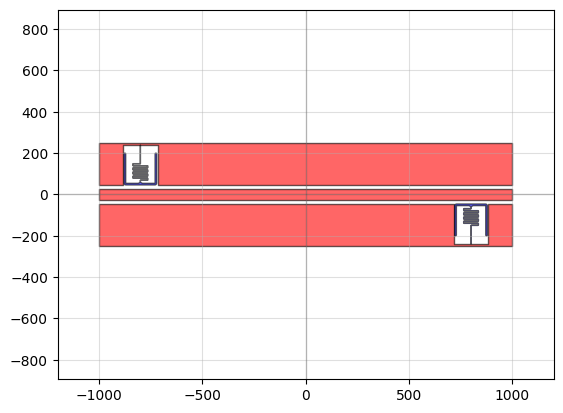

Resonator 1
 Geometric: 0.8245015067590821 nH/m
 Kinetic: 24.974999999999998 nH/m
 Ltot: 25.799501506759082 nH
 Cg: 61.602506019797396 fF
 Cc: 0.38235048917362946 fF
Resonator 2
 Geometric: 0.62094648508209 nH/m
 Kinetic: 5.876470588235295 nH/m
 Ltot: 6.4974170733173855 nH
 Cg: 45.09774679238056 fF
 Cc: 0.48139453790701436 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(3.9798955480606484), np.float64(9.248401796374852)]


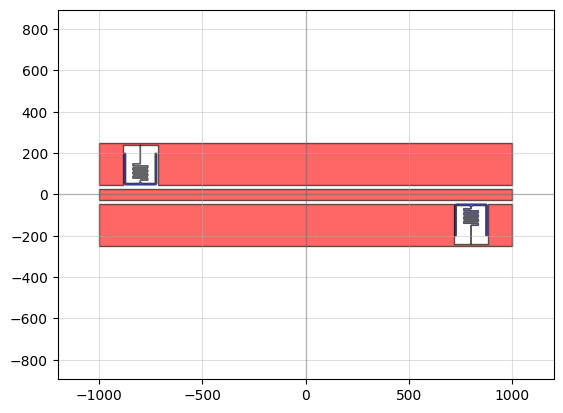

Resonator 1
 Geometric: 0.7921315372117926 nH/m
 Kinetic: 19.980000000000004 nH/m
 Ltot: 20.772131537211795 nH
 Cg: 58.97932655422232 fF
 Cc: 0.39488313457044105 fF
Resonator 2
 Geometric: 0.6290294208992079 nH/m
 Kinetic: 6.243750000000001 nH/m
 Ltot: 6.872779420899208 nH
 Cg: 45.75189829419371 fF
 Cc: 0.47626503441920714 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(4.531903760968874), np.float64(8.928954488123853)]


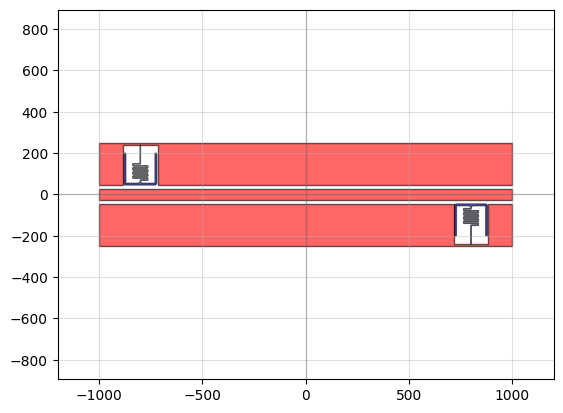

Resonator 1
 Geometric: 0.7658559428878824 nH/m
 Kinetic: 16.65 nH/m
 Ltot: 17.415855942887884 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Resonator 2
 Geometric: 0.6376965001370033 nH/m
 Kinetic: 6.66 nH/m
 Ltot: 7.297696500137003 nH
 Cg: 46.45352468936156 fF
 Cc: 0.4709141414417874 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(5.040182347020097), np.float64(8.600578991470664)]


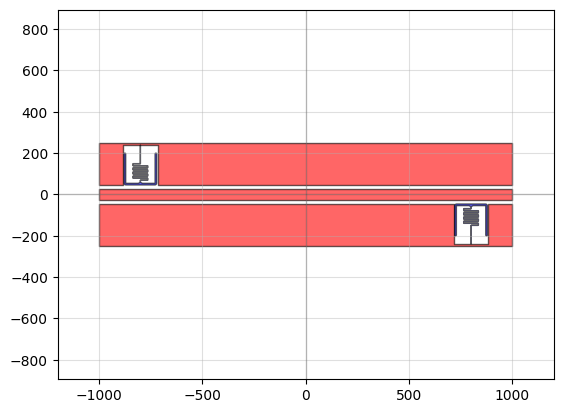

Resonator 1
 Geometric: 0.7437890939886089 nH/m
 Kinetic: 14.271428571428574 nH/m
 Ltot: 15.01521766541718 nH
 Cg: 55.05701386491389 fF
 Cc: 0.4154511593214476 fF
Resonator 2
 Geometric: 0.647028857544925 nH/m
 Kinetic: 7.135714285714287 nH/m
 Ltot: 7.782743143259212 nH
 Cg: 47.20925233763937 fF
 Cc: 0.4653164397313892 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(5.514619891507593), np.float64(8.262479522404204)]


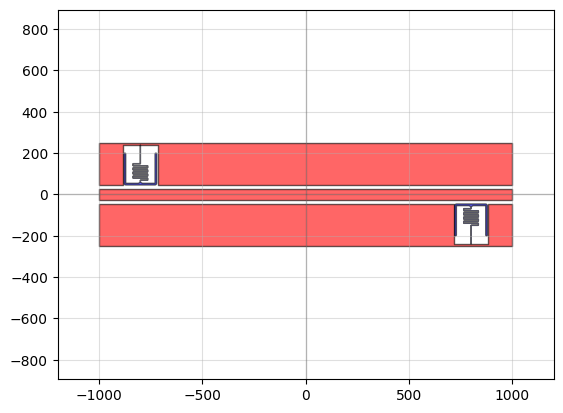

Resonator 1
 Geometric: 0.7248045254295099 nH/m
 Kinetic: 12.487500000000002 nH/m
 Ltot: 13.212304525429511 nH
 Cg: 53.51619147816259 fF
 Cc: 0.4242245846801353 fF
Resonator 2
 Geometric: 0.6571256300599637 nH/m
 Kinetic: 7.684615384615385 nH/m
 Ltot: 8.341741014675348 nH
 Cg: 48.02717323790241 fF
 Cc: 0.4594414191135037 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(5.961749145472562), np.float64(7.913723080050734)]


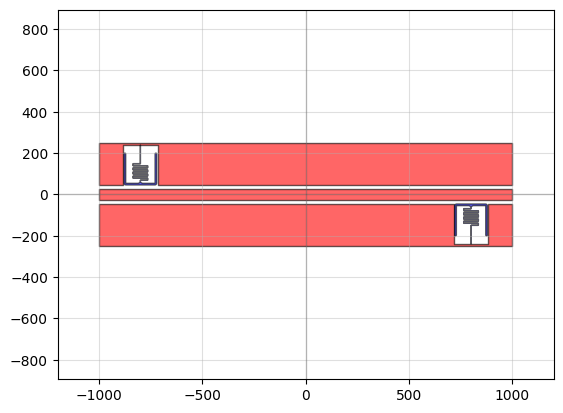

Resonator 1
 Geometric: 0.7081750615074417 nH/m
 Kinetic: 11.100000000000001 nH/m
 Ltot: 11.808175061507443 nH
 Cg: 52.16669792513776 fF
 Cc: 0.4322745626952759 fF
Resonator 2
 Geometric: 0.668109716864472 nH/m
 Kinetic: 8.325 nH/m
 Ltot: 8.993109716864472 nH
 Cg: 48.91731131677377 fF
 Cc: 0.4532519639424956 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(6.3861646269484496), np.float64(7.55320278489235)]


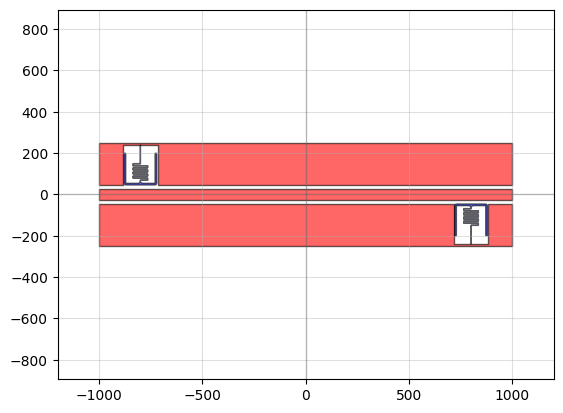

Resonator 1
 Geometric: 0.6934038001345344 nH/m
 Kinetic: 9.990000000000002 nH/m
 Ltot: 10.683403800134537 nH
 Cg: 50.96832050690628 fF
 Cc: 0.43973447651763514 fF
Resonator 2
 Geometric: 0.6801360480553927 nH/m
 Kinetic: 9.081818181818182 nH/m
 Ltot: 9.761954229873576 nH
 Cg: 49.892290615285226 fF
 Cc: 0.44670221619476913 fF
Inductor total length is [740. 740.]
The frequencies are [np.float64(6.791250084287095), np.float64(7.179587405926023)]


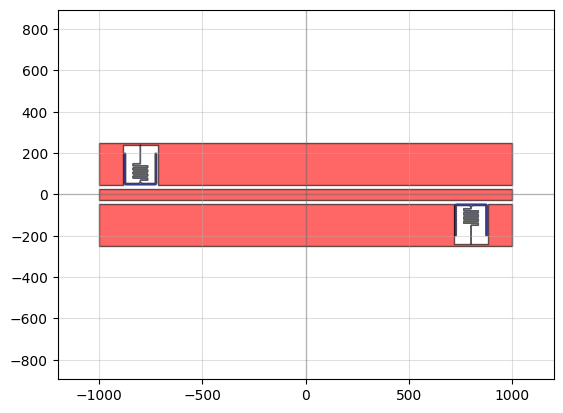

ValueError: x and y must have same first dimension, but have shapes (20,) and (10, 2)

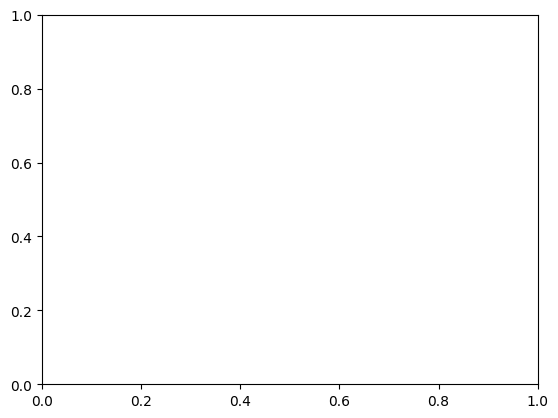

In [71]:
#changing width of inductor for two resonators

NumberOfResonators = int(2)
SeparationTlineResonator = [0]*NumberOfResonators


l = np.linspace(100,180,10)
Ind_width =  np.linspace(0.1,2,20)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*[70]
InductorHorizontalLength = np.ones(NumberOfResonators)*[70]


#InductorWidth = Ind_width 
InductorWidth = np.ones(NumberOfResonators)*0.6

TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freq = resonance_freq_Schuster(InductorWidth*1e-6, CapacitorWidth*1e-6, (SeparationTlineResonator + FeedlineGap + SpacingCc)*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength*1e-6, SpacingC0*1e-6, 
#                                             InductorWidth*1e-6, InductorTotalLength*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9

# freqs = []       
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)



FeedlineLength = 2000
ChipSize = [FeedlineLength, 500]
freqs = []
for j in range(int(len(Ind_width)/2)):
    InductorWidth = np.ones(NumberOfResonators)*[Ind_width[j],Ind_width[-(j+1)]]
    #CapacitorVerticalLength = np.ones(NumberOfResonators)*[l[j],l[-j]]
    freq = []
    for i in range(NumberOfResonators):
        print(f'Resonator {i+1}')
        freq.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                                CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                                InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                            epsilon_r, thickness_subs)/1e9)                                        

    print('Inductor total length is', InductorTotalLength)
    print('The frequencies are', freq) 
    freqs.append(freq)


    c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                            FeedlineWidth, FeedlineLength, FeedlineGap, 
                            FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                            CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                            NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                            TaperWidth, TaperLength, SpacingC0, SpacingCc,
                            FinalSpacingBondpads, MWO_simulation=True)      
    #chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/juliantryingstuff/variableindwidth/singleres_indwidth_{round(Ind_width[i],2)}.gds")
    qp(chip)

plt.plot(Ind_width,freqs, '.')
plt.xlabel("inductor width (um)")
plt.ylabel("estimated f (GHz)")
plt.show()

Resonator 1
 Geometric: 1.2443913315545683 nH/m
 Kinetic: 17.955000000000002 nH/m
 Ltot: 19.19939133155457 nH
 Cg: 50.96832050690628 fF
 Cc: 0.43973447651763514 fF
Inductor total length is [1330.]
The frequencies are [np.float64(5.0659490186010725)]


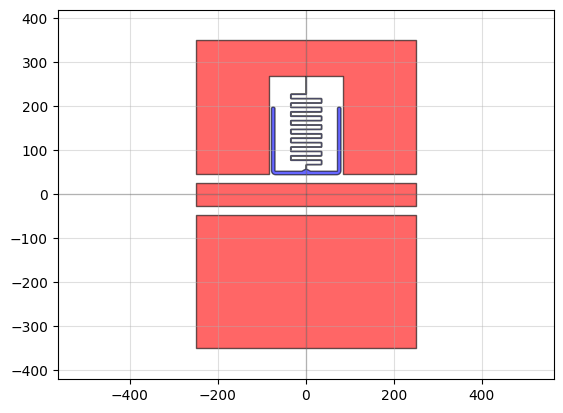

In [34]:
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[15]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*[20]
InductorHorizontalLength = np.ones(NumberOfResonators)*[70]
InductorWidth = np.ones(NumberOfResonators)*1
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)
FeedlineLength = 500
ChipSize = [FeedlineLength, 700]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241115-juliantryingstuff\singleresonator_5GHz.gds")
qp(chip)

Resonator 1
 Geometric: 0.9309111029930295 nH/m
 Kinetic: 20.25 nH/m
 Ltot: 21.18091110299303 nH
 Cg: 56.84785371309432 fF
 Cc: 0.4057650343870702 fF
Resonator 2
 Geometric: 0.596129678686359 nH/m
 Kinetic: 7.425 nH/m
 Ltot: 8.021129678686359 nH
 Cg: 48.91731131677377 fF
 Cc: 0.4532519639424956 fF
Inductor total length is [900. 660.]
The frequencies are [np.float64(4.570317189451233), np.float64(7.9977591561242765)]


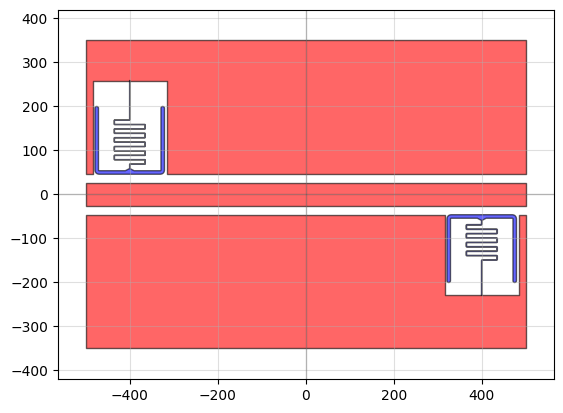

In [44]:
NumberOfResonators = int(2)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[150,150]
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[9, 6]
InductorVerticalLength = np.ones(NumberOfResonators)*[10,10]
InductorEndLength = np.ones(NumberOfResonators)*[70 ,70]
InductorHorizontalLength = np.ones(NumberOfResonators)*[70, 70]
InductorWidth = np.ones(NumberOfResonators)*[0.6,1.2]
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)
FeedlineLength = 1000
ChipSize = [FeedlineLength, 700]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241115-juliantryingstuff\tworesonators_4-8GHz.gds")
qp(chip)

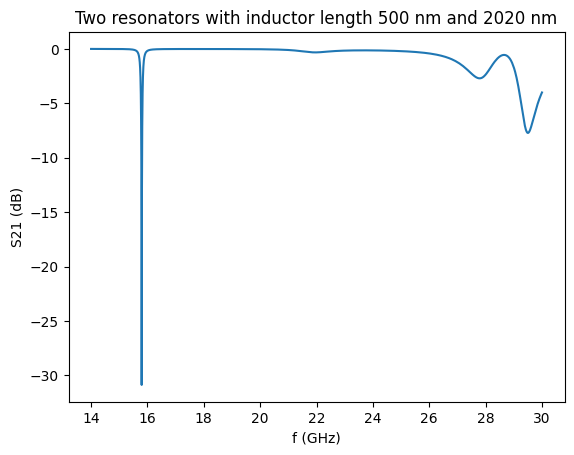

In [57]:
import numpy as np
from scipy.signal import find_peaks

import matplotlib.pyplot as plt

# Load data from txt file
data_tworesonators = np.loadtxt(r"C:\Users\localadmin\Documents\AWR_Projects\exports\dataS21_tworesonators_indwidth_500_2020.txt")

# Assuming the data has two columns: x and y
x = data_tworesonators[:, 0]
y = data_tworesonators[:, 1]



# Plot the data
plt.plot(x, y)
plt.xlabel('f (GHz)')
plt.ylabel('S21 (dB)')
plt.title('Two resonators with inductor length 500 nm and 2020 nm')
plt.show()

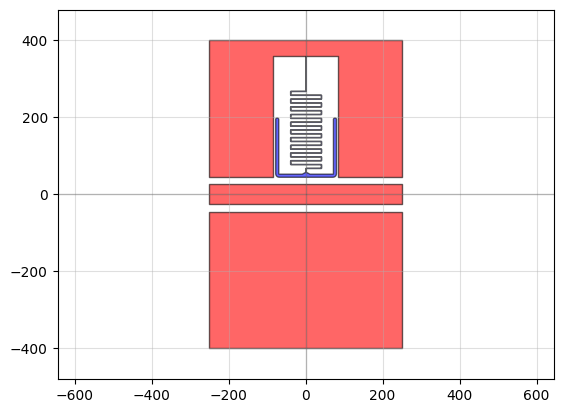

In [22]:
#4p2GHz
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[18]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[80]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)
FeedlineLength = 500
ChipSize = [FeedlineLength, 800]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-First-2.gds")
qp(chip)

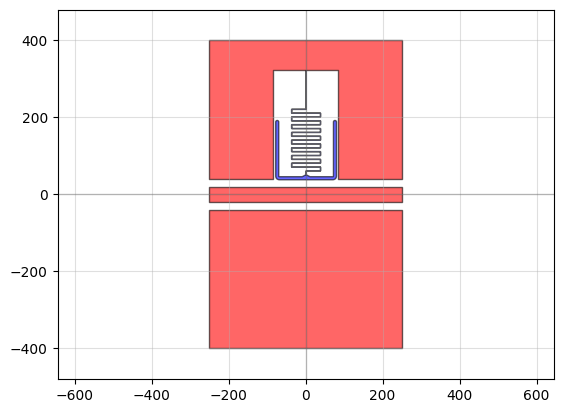

In [ ]:
#5GHz
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[15]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[75]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)
FeedlineLength = 500
ChipSize = [FeedlineLength, 800]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-First-1.gds")
qp(chip)

In [ ]:
# 5p6GHz

NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[12]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[70]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# freqs = []
# for i in range(NumberOfResonators):
#     print(f'Resonator {i+1}')
#     freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
#                                             CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
#                                             InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, 13.5e-12,
#                                         epsilon_r, thickness_subs)/1e9)                                        

# print('Inductor total length is', InductorTotalLength)
# print('The frequencies are', freqs)
FeedlineLength = 500
ChipSize = [FeedlineLength, 800]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

# chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-First-1.gds")
qp(chip)

Full chip

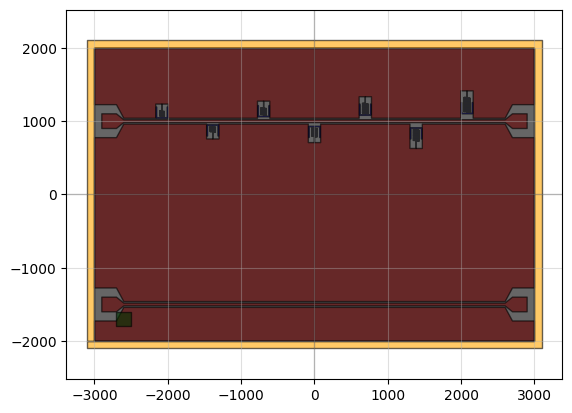

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20241001-GeRes-Pt-13pHsq\\20241001-GeRes-Pt-13pHsq-4x6.gds'

In [ ]:
NumberOfResonators = int(7)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8
# 7p6 ; 7p2 ; 6p5 ; 5p8; 5p6 ; 5 ; 4p4
NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7, 7, 9, 10, 12, 15, 18]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([70, 70, 70, 70,  80, 80, 80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[60,70, 70,  72.5, 75,  75, 80]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0, 10, 20, 30, 40, 50, 60]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

FeedlineLength = 5200
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength + 2*FinalSpacingBondpads, 4000]

c, metal, chip = ChipResonatorsTwoTlines(ChipSize, NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth,InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads ,
                        MWO_simulation = False,
                        cap_sim = False,
                        ypos_tlines = [1000, -1500])

qp(chip)
#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-4x6.gds")


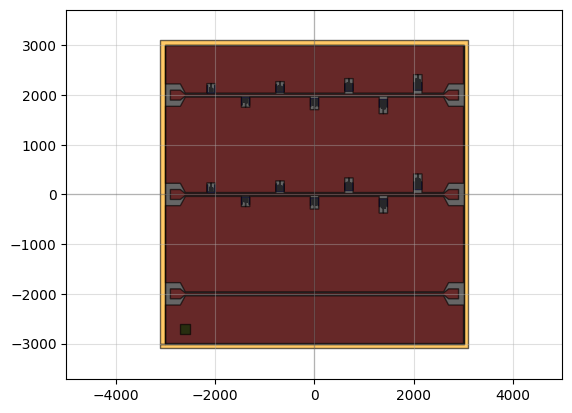

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20241001-GeRes-Pt-13pHsq\\20241001-GeRes-Pt-13pHsq-6x6.gds'

In [ ]:
NumberOfResonators = int(7)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8
# 7p6 ; 7p2 ; 6p5 ; 5p8; 5p6 ; 5 ; 4p4
NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7, 7, 9, 10, 12, 15, 18]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([70, 70, 70, 70,  80, 80, 80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[60,70, 70,  72.5, 75,  75, 80]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0, 10, 20, 30, 40, 50, 60]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

FeedlineLength = 5200
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength + 2*FinalSpacingBondpads, 6000]

c, metal, chip = ChipResonatorsThreeTlines(ChipSize, NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth,InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads ,
                        MWO_simulation = False,
                        cap_sim = False,
                        ypos_tlines = [2000, 0, -2000])

qp(chip)
#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241001-GeRes-Pt-13pHsq\20241001-GeRes-Pt-13pHsq-6x6.gds")
